#### Análisis de Los Simpsons
##### Autores: Carlos Basaez - Sebastián Hermosilla
##### Fecha de creación:17/08/22
##### Última modificación: 18/08/22 

In [202]:
#importamos las librerias
import pandas as pd #manipulación y análisis de datos
import numpy as np #soporte para crear vectores y matrices grandes multidimensionales
import seaborn as sb #biblioteca de visualización de datos de Python
import matplotlib.pyplot as plt #biblioteca de visualización de datos de Python
import re #Expresiones regulares

In [203]:
#llamamos la url donde obtendremos los datos
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_The_Simpsons_episodes_(seasons_1-20)')

In [204]:
#transformamos el HTML a csv
df[0].to_csv('../dataset/simpsons.csv')

In [205]:
#leemos el csv y lo pasamos a una variable llamada data
data = pd.read_csv('../dataset/simpsons.csv')

In [206]:
#mostramos los 5 primeros registros
data.head()

,Unnamed: 0,Season,Episodes,Episodes.1,Originally aired,Originally aired.1,Households / viewers,Rank,Rating
0,NaN,Season,Episodes,Episodes.1,First aired,Last aired,Households / viewers,Rank,Rating
1,0.0,1,13,13,"December 17, 1989","May 13, 1990",13.4m h.[n1][12],30,14.5
2,1.0,2,22,22,"October 11, 1990","July 11, 1991",12.2m h.[n1][n2],38[13],8.0
3,2.0,3,24,24,"September 19, 1991","August 27, 1992",12.0m h.[n1][n3],33[14],—
4,3.0,4,22,22,"September 24, 1992","May 13, 1993",12.1m h.[n1][15],30,13.0


#### Limpiando los datos

In [207]:
#quitamos la columna unnamed, y la fila 0 que contiene informacion innecesaria
df_clean = data.drop(['Unnamed: 0'], axis=1)
df_clean = df_clean.drop([0])
df_clean = df_clean.drop(['Episodes.1'], axis=1)

In [208]:
#cambiamos el nombre de las columnas
clean_data = df_clean.rename({'Season': 'Temporada', 'Episodes': 'Episodios', 'Originally aired': 'Primer lanzamiento',
          'Originally aired.1': 'Ultimo lanzamiento', 'Households / viewers': 'Espectadores',
          'Ranking': 'Rank', 'Rating' : 'Rating'}, axis=1)

In [209]:
#verificamos que se haya hecho la limpieza y mostramos los nuevos registros
clean_data.head()
clean_data.dtypes

Temporada             object
Episodios             object
Primer lanzamiento    object
Ultimo lanzamiento    object
Espectadores          object
Rank                  object
Rating                object
dtype: object

In [210]:
#reemplazamos los guiones por 0.0 en rating
clean_data['Rating'] = clean_data['Rating'].replace(['—'],0.0)

In [211]:
#Verificamos el reemplazo de guiones por ceros
clean_data.head()

,Temporada,Episodios,Primer lanzamiento,Ultimo lanzamiento,Espectadores,Rank,Rating
1,1,13,"December 17, 1989","May 13, 1990",13.4m h.[n1][12],30,14.5
2,2,22,"October 11, 1990","July 11, 1991",12.2m h.[n1][n2],38[13],8.0
3,3,24,"September 19, 1991","August 27, 1992",12.0m h.[n1][n3],33[14],0.0
4,4,22,"September 24, 1992","May 13, 1993",12.1m h.[n1][15],30,13.0
5,5,22,"September 30, 1993","May 19, 1994",10.5m h.[n1][n4],53[16],0.0


In [212]:
#Limpia hipervinculos de columna 'Rank'
clean_data['Rank'] = data_clean['Rank'].replace("\[.*?\]","",regex=True)

In [213]:
#Muestra primero 5 registros para verificar la eliminacion de hipervinculos
clean_data.head()

,Temporada,Episodios,Primer lanzamiento,Ultimo lanzamiento,Espectadores,Rank,Rating
1,1,13,"December 17, 1989","May 13, 1990",13.4m h.[n1][12],30,14.5
2,2,22,"October 11, 1990","July 11, 1991",12.2m h.[n1][n2],38,8.0
3,3,24,"September 19, 1991","August 27, 1992",12.0m h.[n1][n3],33,0.0
4,4,22,"September 24, 1992","May 13, 1993",12.1m h.[n1][15],30,13.0
5,5,22,"September 30, 1993","May 19, 1994",10.5m h.[n1][n4],53,0.0


In [214]:
#Limpia hipervinculos de columna 'Espectadores'
clean_data['Espectadores'] = data_clean['Espectadores'].replace("\[.*?\]","",regex=True)

In [215]:
#Muestra primero 5 registros para verificar la eliminacion de hipervinculos
clean_data.head()

,Temporada,Episodios,Primer lanzamiento,Ultimo lanzamiento,Espectadores,Rank,Rating
1,1,13,"December 17, 1989","May 13, 1990",13.4m h.,30,14.5
2,2,22,"October 11, 1990","July 11, 1991",12.2m h.,38,8.0
3,3,24,"September 19, 1991","August 27, 1992",12.0m h.,33,0.0
4,4,22,"September 24, 1992","May 13, 1993",12.1m h.,30,13.0
5,5,22,"September 30, 1993","May 19, 1994",10.5m h.,53,0.0


In [216]:
#declara variables para almacenar columnas (Series)
rating = clean_data['Rating']
temporada = clean_data['Temporada']
espectadores = clean_data['Espectadores']
espectadores_casa = clean_data['Espectadores'].iloc[:11]
espectadores_persona = clean_data['Espectadores'].iloc[11:]

In [217]:
#Setea dimensiones de los graficos y paleta de colores
sb.set(rc = {'figure.figsize':(15,8)})
sb.set_palette("bright")

<AxesSubplot:xlabel='Temporada', ylabel='Rating'>

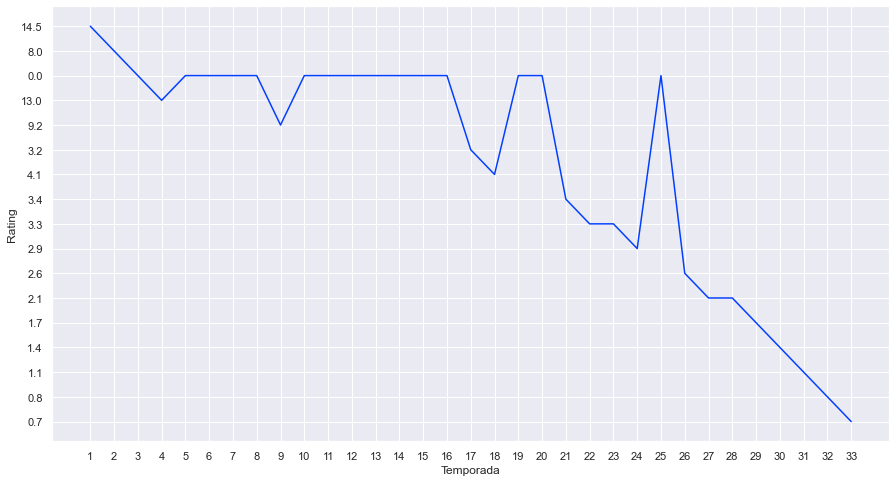

In [218]:
#Grafico de lineas para mostrar la relacion entre Temporada y Rating
sb.lineplot(x=temporada.map(str),y=rating.map(str))

<AxesSubplot:xlabel='Temporada', ylabel='Espectadores'>

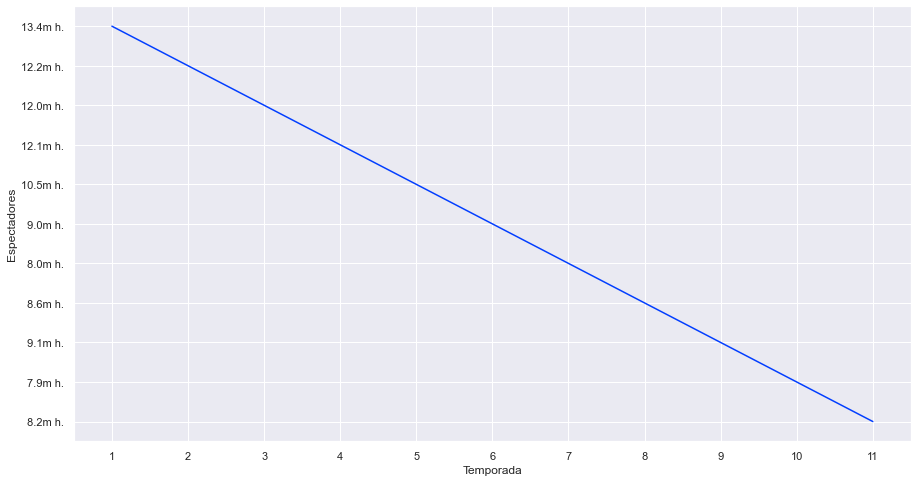

In [219]:
#Gráfico de lineas para motrar relacion entre Temporada y espectadores de casa
sb.lineplot(x=temporada.map(str),y=espectadores_casa.map(str))

<AxesSubplot:xlabel='Temporada', ylabel='Espectadores'>

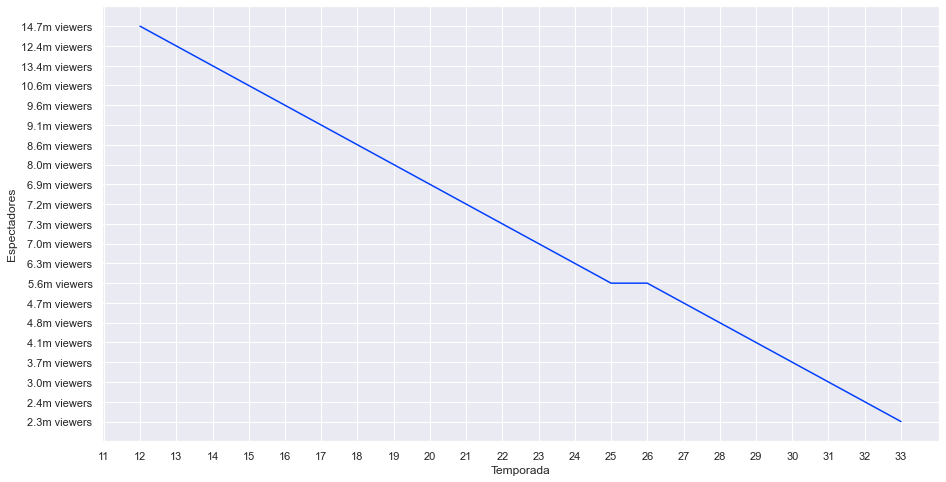

In [220]:
##Gráfico de lineas para motrar relacion entre Temporada y espectadores individual
sb.lineplot(x=temporada.map(str),y=espectadores_persona.map(str))